In [28]:
import pandas as pd
finrl_processed_data_fname = "/home/devmiftahul/trading_model/from_finrl-tutorials_git/tuntun_scripts/processed_data/processed_data_135_tickers_with_features.csv"
processed = pd.read_csv(finrl_processed_data_fname)
processed

,date,open,high,low,close,volume,tic,day,macd,rsi_30,cci_30,dx_30,turbulence
0,2010-01-04,21486.79,22725.50,21486.79,22725.50,1.0,AALI,1,0.000000,100.000000,66.666667,100.000000,0.000000
1,2010-01-04,44.49,45.29,44.49,44.49,1.0,ABBA,1,0.000000,100.000000,66.666667,100.000000,0.000000
2,2010-01-04,305.00,305.00,300.00,300.00,1.0,ABDA,1,0.000000,100.000000,66.666667,100.000000,0.000000
3,2010-01-04,151.00,151.00,147.00,148.00,1.0,ACES,1,0.000000,100.000000,66.666667,100.000000,0.000000
4,2010-01-04,630.00,630.00,620.00,630.00,1.0,ADES,1,0.000000,100.000000,66.666667,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493267,2024-11-26,1170.00,1170.00,1150.00,1170.00,1.0,GJTL,3627,-36.096489,48.634077,-60.027192,2.261612,1584.755691
493268,2024-11-26,3430.00,3430.00,3310.00,3430.00,1.0,GMTD,3627,-126.704731,42.176690,-193.104659,8.990604,1584.755691
493269,2024-11-26,95.00,96.00,94.00,95.00,1.0,GPRA,3627,-0.649351,47.998174,-111.913357,15.451220,1584.755691
493270,2024-11-26,55.00,58.00,54.00,55.00,1.0,GSMF,3627,-0.426360,50.465542,-29.571351,35.591829,1584.755691


In [4]:
tickers = sorted(processed.tic.unique())
len(tickers)

136

In [27]:
df_portfolio_test

,date,open,high,low,close,volume,tic,day,macd,rsi_30,cci_30,dx_30,turbulence
489600,2024-10-21,6775.0,6800.0,6700.0,6725.0,1.0,AALI,3601,84.256883,56.623689,74.566571,28.240526,665.959333
489601,2024-10-21,38.0,38.0,38.0,38.0,1.0,ABBA,3601,0.923689,58.520198,37.295225,7.829588,665.959333
489602,2024-10-21,4060.0,4060.0,4060.0,4060.0,1.0,ABDA,3601,-47.666498,2.239225,-25.641026,92.203027,665.959333
489603,2024-10-21,945.0,950.0,920.0,930.0,1.0,ACES,3601,26.460362,59.517888,112.712301,47.078407,665.959333
489604,2024-10-21,10750.0,12500.0,10750.0,11225.0,1.0,ADES,3601,231.243968,63.503335,181.460369,66.963133,665.959333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493267,2024-11-26,1170.0,1170.0,1150.0,1170.0,1.0,GJTL,3627,-36.096489,48.634077,-60.027192,2.261612,1584.755691
493268,2024-11-26,3430.0,3430.0,3310.0,3430.0,1.0,GMTD,3627,-126.704731,42.176690,-193.104659,8.990604,1584.755691
493269,2024-11-26,95.0,96.0,94.0,95.0,1.0,GPRA,3627,-0.649351,47.998174,-111.913357,15.451220,1584.755691
493270,2024-11-26,55.0,58.0,54.0,55.0,1.0,GSMF,3627,-0.426360,50.465542,-29.571351,35.591829,1584.755691


In [30]:
from finrl.meta.env_portfolio_optimization.env_portfolio_optimization import PortfolioOptimizationEnv
df = processed.copy()
df_portfolio_train = df[df["day"] <= 3500]
df_portfolio_test = df[df["day"] > 3500]
TIME_WINDOW = 63
features=["close", "high", "low", "macd", "rsi_30", "cci_30", "dx_30"]

environment_train = PortfolioOptimizationEnv(
        df_portfolio_train,
        initial_amount=100000,
        comission_fee_pct=0.0025,
        time_window=TIME_WINDOW,
        features=features,
        time_column="day",
        normalize_df=None, # dataframe is already normalized
        tics_in_portfolio=tickers
    )
environment_test = PortfolioOptimizationEnv(
        df_portfolio_test,
        initial_amount=100000,
        comission_fee_pct=0.0025,
        time_window=TIME_WINDOW,
        features=features,
        time_column="day",
        normalize_df=None, # dataframe is already normalized
        tics_in_portfolio=tickers
    )

In [10]:
df_portfolio_test

,date,open,high,low,close,volume,tic,day,macd,rsi_30,cci_30,dx_30,turbulence
489600,2024-10-21,6775.0,6800.0,6700.0,6725.0,1.0,AALI,3601,84.256883,56.623689,74.566571,28.240526,665.959333
489601,2024-10-21,38.0,38.0,38.0,38.0,1.0,ABBA,3601,0.923689,58.520198,37.295225,7.829588,665.959333
489602,2024-10-21,4060.0,4060.0,4060.0,4060.0,1.0,ABDA,3601,-47.666498,2.239225,-25.641026,92.203027,665.959333
489603,2024-10-21,945.0,950.0,920.0,930.0,1.0,ACES,3601,26.460362,59.517888,112.712301,47.078407,665.959333
489604,2024-10-21,10750.0,12500.0,10750.0,11225.0,1.0,ADES,3601,231.243968,63.503335,181.460369,66.963133,665.959333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493267,2024-11-26,1170.0,1170.0,1150.0,1170.0,1.0,GJTL,3627,-36.096489,48.634077,-60.027192,2.261612,1584.755691
493268,2024-11-26,3430.0,3430.0,3310.0,3430.0,1.0,GMTD,3627,-126.704731,42.176690,-193.104659,8.990604,1584.755691
493269,2024-11-26,95.0,96.0,94.0,95.0,1.0,GPRA,3627,-0.649351,47.998174,-111.913357,15.451220,1584.755691
493270,2024-11-26,55.0,58.0,54.0,55.0,1.0,GSMF,3627,-0.426360,50.465542,-29.571351,35.591829,1584.755691


In [31]:
import torch
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [12]:
from finrl.agents.portfolio_optimization.architectures import EIIE

In [34]:
from finrl.agents.portfolio_optimization.models import DRLAgent
model_kwargs = {
    "lr": 0.001,
    "policy": EIIE,
}
policy_kwargs = {
    "initial_features": 7,
    "k_size": 3,
    "conv_mid_features": 2,
    "conv_final_features": 20,
    "time_window": TIME_WINDOW
}

model = DRLAgent(environment_train).get_model("pg", device, model_kwargs, policy_kwargs)

In [35]:
DRLAgent.train_model(model, episodes=2)

  0%|                                                                                                                                                     | 0/2 [00:00<?, ?it/s]

Initial portfolio value:100000
Final portfolio value: 104751.1484375
Final accumulative portfolio value: 1.047511484375
Maximum DrawDown: -0.8801291554157775
Sharpe ratio: 0.1882357665368007


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
 50%|██████████████████████████████████████████████████████████████████████                                                                      | 1/2 [14:48<14:48, 888.12s/it]

Initial portfolio value:100000
Final portfolio value: 845172.9375
Final accumulative portfolio value: 8.451729375
Maximum DrawDown: -0.6251476983726416
Sharpe ratio: 0.2771530078738952


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [29:47<00:00, 893.83s/it]


In [36]:
model

In [37]:
import os
d = "tuntun_api_trained_models/eiie"
os.makedirs(d, exist_ok=True)
model_path = f"{d}/policy_EIIE.pt"
torch.save(model.train_policy.state_dict(), model_path)

In [38]:
EIIE_results = {
    "train": environment_train._asset_memory["final"],
    "test": {},
}

# instantiate an architecture with the same arguments used in training
# and load with load_state_dict.
policy = EIIE(**policy_kwargs)
policy.load_state_dict(torch.load(model_path))

# testing
DRLAgent.DRL_validation(model, environment_test, policy=policy)
EIIE_results["test"] = environment_test._asset_memory["final"]

/tmp/ipykernel_4080575/2279313485.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  policy.load_state_dict(torch.load(model_path))
findfont: Font family 'Arial' not found.

Initial portfolio value:100000
Final portfolio value: 85916.203125
Final accumulative portfolio value: 0.85916203125
Maximum DrawDown: -0.15843537014441145
Sharpe ratio: -3.8932800269531485


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [39]:
UBAH_results = {
    "train": {},
    "test": {},
}

PORTFOLIO_SIZE = len(tickers)

# train period
terminated = False
environment_train.reset()
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment_train.step(action)
UBAH_results["train"] = environment_train._asset_memory["final"]

# test period
terminated = False
environment_test.reset()
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment_test.step(action)
UBAH_results["test"] = environment_test._asset_memory["final"]

Initial portfolio value:100000
Final portfolio value: 95571824.0
Final accumulative portfolio value: 955.71824
Maximum DrawDown: -0.2968779089278838
Sharpe ratio: 0.39744707919445277


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Initial portfolio value:100000
Final portfolio value: 136472.96875
Final accumulative portfolio value: 1.3647296875
Maximum DrawDown: -0.07062747870078079
Sharpe ratio: 1.8923410002135277


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


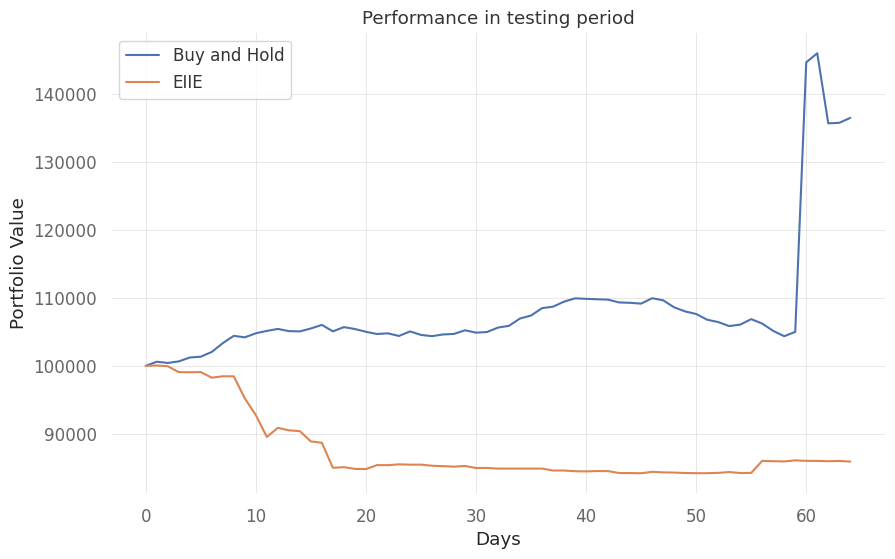

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(UBAH_results["test"], label="Buy and Hold")
plt.plot(EIIE_results["test"], label="EIIE")

plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Performance in testing period")
plt.legend()

plt.show()